# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&q={city}"
    
    print(city_url)
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Add City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If there is an error, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=139be4ff92b0ee3839e70f5b9630b159&q=grytviken
Processing Record 1 of Set 1 | grytviken
http://api.openweathermap.org/data/2.5/weather?appid=139be4ff92b0ee3839e70f5b9630b159&q=saposoa
Processing Record 2 of Set 1 | saposoa
http://api.openweathermap.org/data/2.5/weather?appid=139be4ff92b0ee3839e70f5b9630b159&q=olonkinbyen
Processing Record 3 of Set 1 | olonkinbyen
http://api.openweathermap.org/data/2.5/weather?appid=139be4ff92b0ee3839e70f5b9630b159&q=bubaque
Processing Record 4 of Set 1 | bubaque
http://api.openweathermap.org/data/2.5/weather?appid=139be4ff92b0ee3839e70f5b9630b159&q=port-aux-francais
Processing Record 5 of Set 1 | port-aux-francais
http://api.openweathermap.org/data/2.5/weather?appid=139be4ff92b0ee3839e70f5b9630b159&q=afaahiti
Processing Record 6 of Set 1 | afaahiti
http://api.openweathermap.org/data/2.5/weather?appid=139be4ff92b0ee3839e70f5b9630b159&q=longyear

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,274.18,93,84,5.66,GS,1698180102
1,saposoa,-6.9340,-76.7716,309.92,29,5,1.75,PE,1698180103
2,olonkinbyen,70.9221,-8.7187,276.63,92,47,2.00,SJ,1698180103
3,bubaque,11.2833,-15.8333,301.88,74,100,1.75,GW,1698180103
4,port-aux-francais,-49.3500,70.2167,277.46,91,100,12.05,TF,1698180103


In [7]:
# Export the City_Data into a csv
import os
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

city_data_df = pd.read_csv("output_data/cities.csv", index_col=0)


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,270.12,73,100,3.09,US,1697936750
1,qaqortoq,60.7167,-46.0333,273.46,53,0,2.51,GL,1697936829
2,tiksi,71.6872,128.8694,251.12,100,78,0.74,RU,1697936830
3,albany,42.6001,-73.9662,285.66,81,97,0.89,US,1697936830
4,bredasdorp,-34.5322,20.0403,286.89,90,100,5.91,ZA,1697936830


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

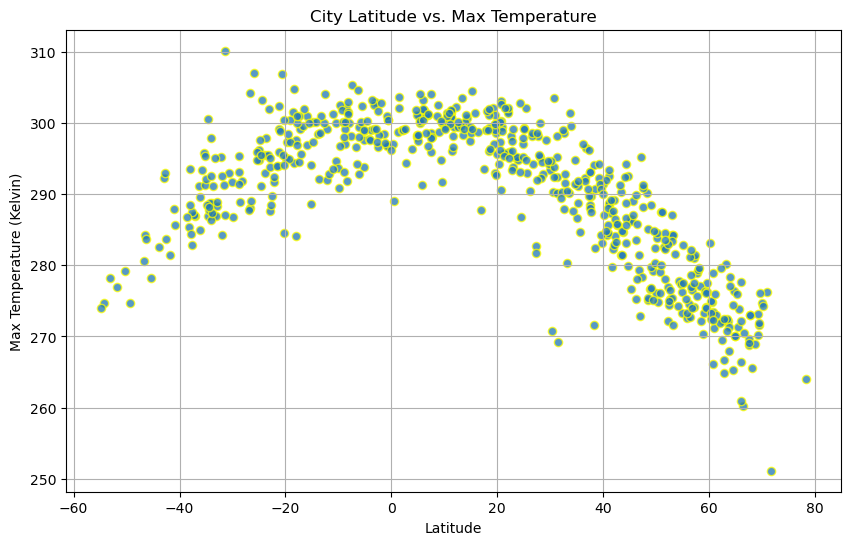

In [8]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df["Lat"].astype(float)
max_temperatures = city_data_df["Max Temp"].astype(float)

plt.figure(figsize=(10, 6))

# Incorporate the other graph properties
plt.scatter(latitudes, max_temperatures, marker="o", edgecolors="yellow", alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Kelvin)")  
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

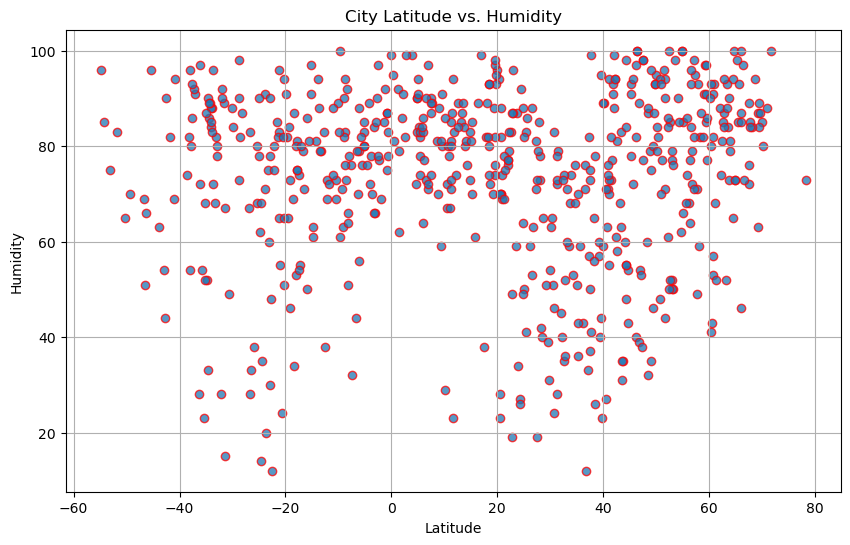

In [9]:
# Build the scatter plots for latitude vs. humidity
humidities = city_data_df["Humidity"].astype(float)

plt.figure(figsize=(10, 6))

# Incorporate the other graph properties
plt.scatter(latitudes, humidities, marker="o", edgecolors="red", alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")  
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

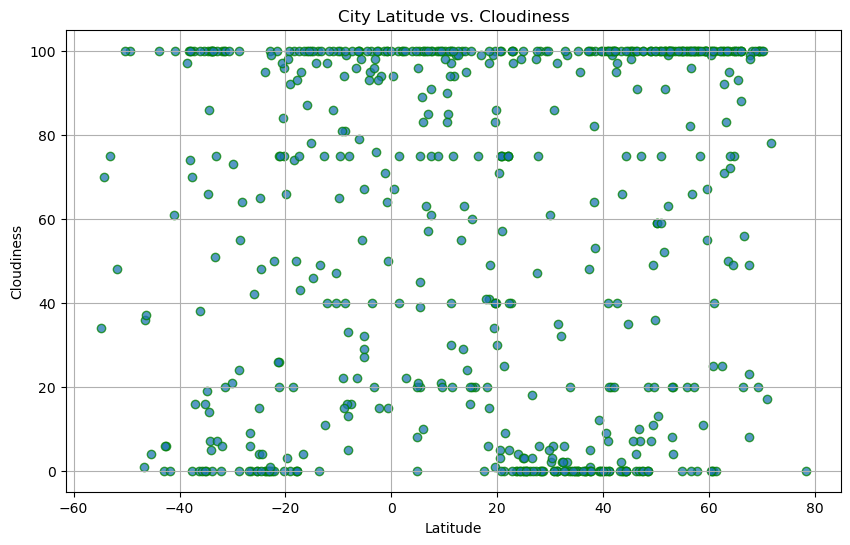

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"].astype(float)

plt.figure(figsize=(10, 6))

# Incorporate the other graph properties
plt.scatter(latitudes, cloudiness, marker="o", edgecolors="green", alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")  
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

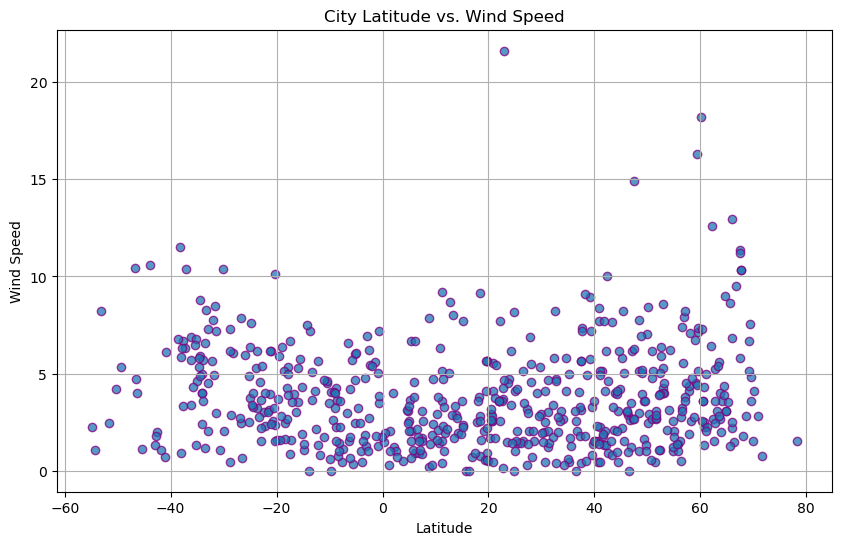

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"].astype(float)

plt.figure(figsize=(10, 6))

# Incorporate the other graph properties
plt.scatter(latitudes, wind, marker="o", edgecolors="purple", alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")  
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def perform_linear_regression(x, y):
    result = linregress(x, y)
    return result.slope, result.intercept, result.rvalue, result.pvalue, result.stderr

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,270.12,73,100,3.09,US,1697936750
1,qaqortoq,60.7167,-46.0333,273.46,53,0,2.51,GL,1697936829
2,tiksi,71.6872,128.8694,251.12,100,78,0.74,RU,1697936830
3,albany,42.6001,-73.9662,285.66,81,97,0.89,US,1697936830
5,olonkinbyen,70.9221,-8.7187,276.20,88,17,2.80,SJ,1697936830


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,bredasdorp,-34.5322,20.0403,286.89,90,100,5.91,ZA,1697936830
6,edinburgh of the seven seas,-37.0676,-12.3116,286.94,91,16,10.40,SH,1697936830
8,grytviken,-54.2811,-36.5092,274.65,85,70,1.06,GS,1697936831
10,waitangi,-43.9535,-176.5597,282.57,63,100,10.61,NZ,1697936831
13,port-aux-francais,-49.3500,70.2167,274.64,70,100,5.36,TF,1697936832


###  Temperature vs. Latitude Linear Regression Plot

R-value (Correlation Coefficient): -0.89


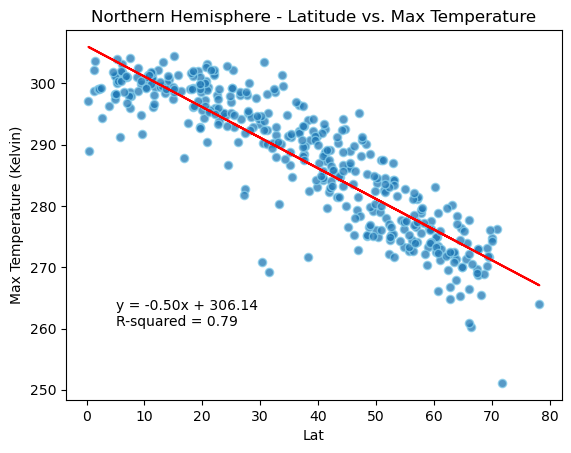

In [15]:
# Linear regression on Northern Hemisphere

northern_lat= northern_hemi_df["Lat"].astype(float)
northern_temp= northern_hemi_df["Max Temp"].astype(float)

slope, intercept, r_value, p_value, std_err = linregress(northern_lat, northern_temp)

plt.scatter(northern_lat, northern_temp, marker="o", edgecolors="skyblue", alpha=0.75)
plt.title("Northern Hemisphere - Latitude vs. Max Temperature")
plt.xlabel("Lat")
plt.ylabel("Max Temperature (Kelvin)")

predicted_temperatures = [slope * lat + intercept for lat in northern_lat]

plt.plot(northern_lat, predicted_temperatures, color='red', label='Linear Regression')

equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(equation, xy=(0.1, 0.2), xycoords='axes fraction', fontsize=10)
print(f"R-value (Correlation Coefficient): {r_value:.2f}")


plt.show()

R-value (Correlation Coefficient): 0.73

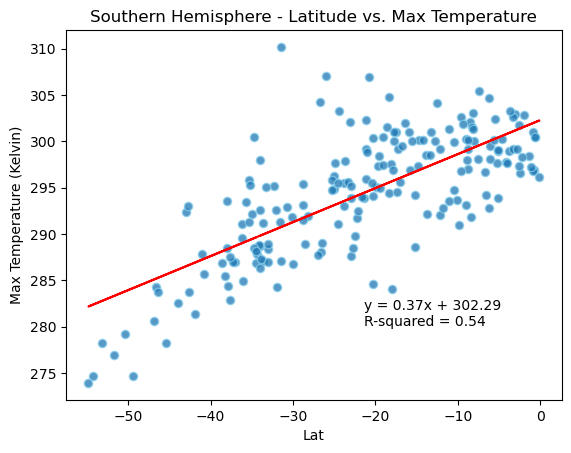

In [16]:
# Linear regression on Southern Hemisphere


southern_lat= southern_hemi_df["Lat"].astype(float)
southern_temp= southern_hemi_df["Max Temp"].astype(float)

slope, intercept, r_value, p_value, std_err = linregress(southern_lat, southern_temp)

plt.scatter(southern_lat, southern_temp, marker="o", edgecolors="skyblue", alpha=0.75)
plt.title("Southern Hemisphere - Latitude vs. Max Temperature")
plt.xlabel("Lat")
plt.ylabel("Max Temperature (Kelvin)")

predicted_temperatures = [slope * lat + intercept for lat in southern_lat]

plt.plot(southern_lat, predicted_temperatures, color='red', label='Linear Regression')

equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(equation, xy=(0.6, 0.2), xycoords='axes fraction', fontsize=10)
print(f"R-value (Correlation Coefficient): {r_value:.2f}")


plt.show()

**Discussion about the linear relationship:** In the Earth's Northern Hemisphere, as one moves further north towards higher latitudes, there is a general trend of decreasing temperatures. Conversely, in the Southern Hemisphere, higher latitudes are associated with higher temperatures. This temperature-latitude relationship reveals a strong negative correlation between latitude and temperature in the Northern Hemisphere, indicating that temperatures tend to decrease as one moves north. In contrast, the Southern Hemisphere demonstrates a strong positive correlation, where higher latitudes correspond to higher temperatures.

### Humidity vs. Latitude Linear Regression Plot

R-value (Correlation Coefficient): 0.04


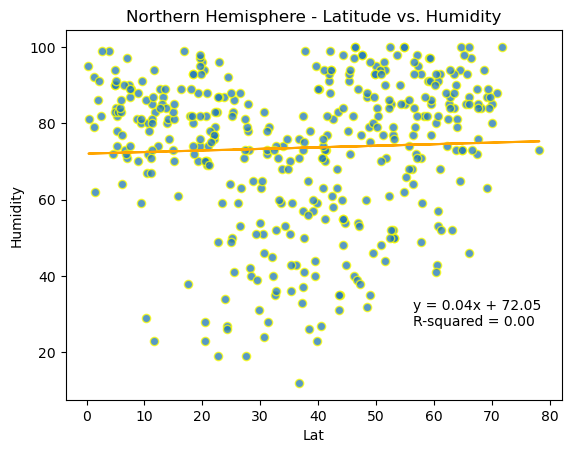

In [17]:
# Northern Hemisphere

northern_humidity= northern_hemi_df["Humidity"].astype(float)

slope, intercept, r_value, p_value, std_err = linregress(northern_lat, northern_humidity)

plt.scatter(northern_lat, northern_humidity, marker="o", edgecolors="yellow", alpha=0.75)
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity")

predicted_humidity = [slope * lat + intercept for lat in northern_lat]

plt.plot(northern_lat, predicted_humidity, color='orange', label='Linear Regression')

equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(equation, xy=(0.7, 0.2), xycoords='axes fraction', fontsize=10)
print(f"R-value (Correlation Coefficient): {r_value:.2f}")


plt.show()

R-value (Correlation Coefficient): 0.08


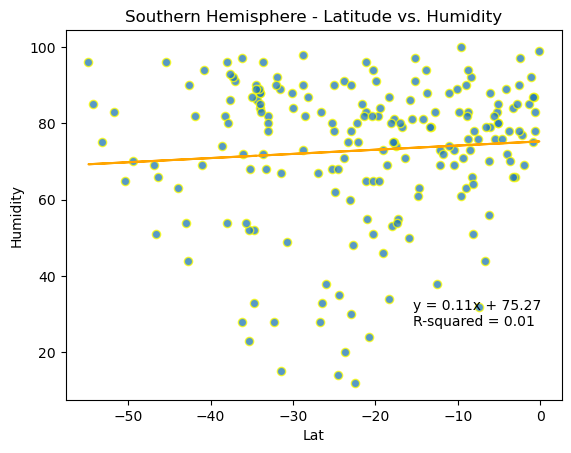

In [18]:
# Southern Hemisphere
southern_humidity= southern_hemi_df["Humidity"].astype(float)

slope, intercept, r_value, p_value, std_err = linregress(southern_lat, southern_humidity)

plt.scatter(southern_lat, southern_humidity, marker="o", edgecolors="yellow", alpha=0.75)
plt.title("Southern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity")

predicted_humidity_south = [slope * lat + intercept for lat in southern_lat]

plt.plot(southern_lat, predicted_humidity_south, color='orange', label='Linear Regression')

equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(equation, xy=(0.7, 0.2), xycoords='axes fraction', fontsize=10)
print(f"R-value (Correlation Coefficient): {r_value:.2f}")


plt.show()

**Discussion about the linear relationship:** Upon thorough analysis of the data, it is evident that there is a weak or negligible relationship between humidity and latitude. In the Northern Hemisphere, the correlation, as indicated by the low R-value of 0.04, suggests that humidity and latitude are not strongly related. Similarly, in the Southern Hemisphere, the calculated p-value of 0.08 reinforces the notion that there is no significant correlation between humidity and latitude in this region. These findings indicate that latitude is not a reliable predictor of humidity, and other factors likely play a more prominent role in determining humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

R-value (Correlation Coefficient): 0.11


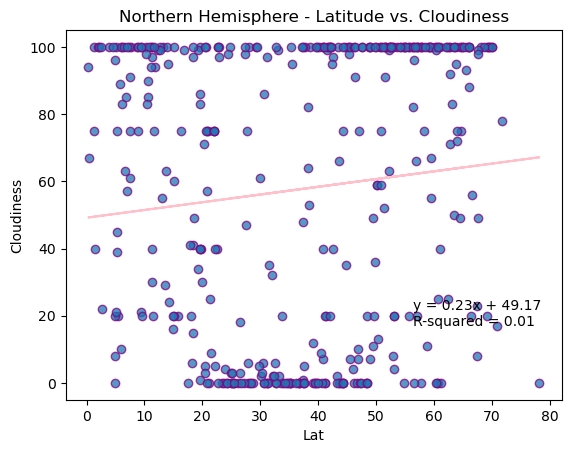

In [19]:
# Northern Hemisphere
northern_cloud= northern_hemi_df["Cloudiness"].astype(float)

slope, intercept, r_value, p_value, std_err = linregress(northern_lat, northern_cloud)

plt.scatter(northern_lat, northern_cloud, marker="o", edgecolors="purple", alpha=0.75)
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")

predicted_cloud = [slope * lat + intercept for lat in northern_lat]

plt.plot(northern_lat, predicted_cloud, color='pink', label='Linear Regression')

equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(equation, xy=(0.7, 0.2), xycoords='axes fraction', fontsize=10)
print(f"R-value (Correlation Coefficient): {r_value:.2f}")


plt.show()

R-value (Correlation Coefficient): 0.19


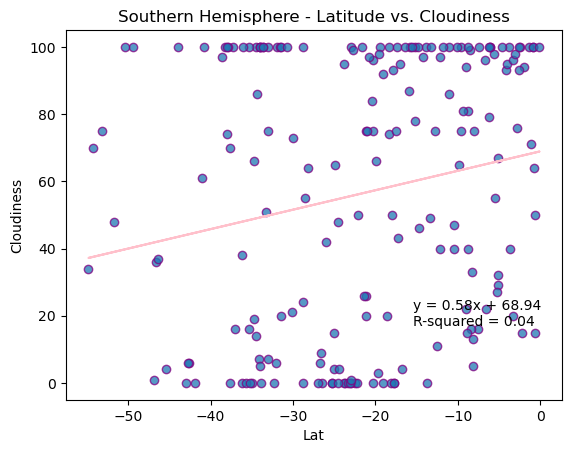

In [20]:
# Southern Hemisphere
southern_cloud= southern_hemi_df["Cloudiness"].astype(float)

slope, intercept, r_value, p_value, std_err = linregress(southern_lat, southern_cloud)

plt.scatter(southern_lat, southern_cloud, marker="o", edgecolors="purple", alpha=0.75)
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")

predicted_cloud_south = [slope * lat + intercept for lat in southern_lat]

plt.plot(southern_lat, predicted_cloud_south, color='pink', label='Linear Regression')

equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(equation, xy=(0.7, 0.2), xycoords='axes fraction', fontsize=10)
print(f"R-value (Correlation Coefficient): {r_value:.2f}")


plt.show()

**Discussion about the linear relationship:** In both hemispheres, a mild positive relationship between latitude and cloudiness is observed. Nevertheless, the findings remain inconclusive due to the high dispersion of data points and the presence of a relatively low correlation value. These results suggest that while there may be a tendency for cloudiness to increase with latitude, the relationship is not sufficiently strong or consistent to draw definitive conclusions. 

### Wind Speed vs. Latitude Linear Regression Plot

R-value (Correlation Coefficient): 0.25


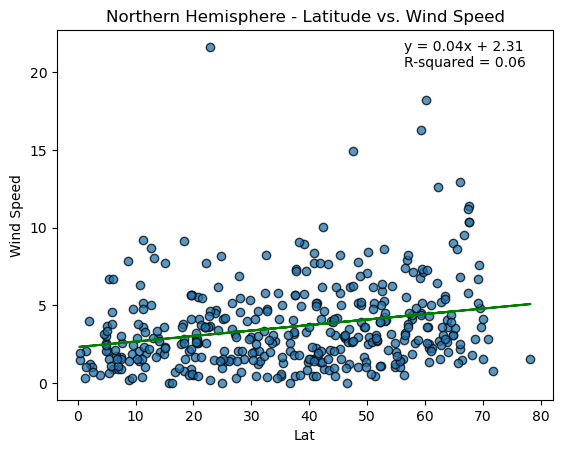

In [21]:
# Northern Hemisphere
northern_wind= northern_hemi_df["Wind Speed"].astype(float)

slope, intercept, r_value, p_value, std_err = linregress(northern_lat, northern_wind)

plt.scatter(northern_lat, northern_wind, marker="o", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")

predicted_wind = [slope * lat + intercept for lat in northern_lat]

plt.plot(northern_lat, predicted_wind, color='green', label='Linear Regression')

equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(equation, xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
print(f"R-value (Correlation Coefficient): {r_value:.2f}")


plt.show()

R-value (Correlation Coefficient): -0.27


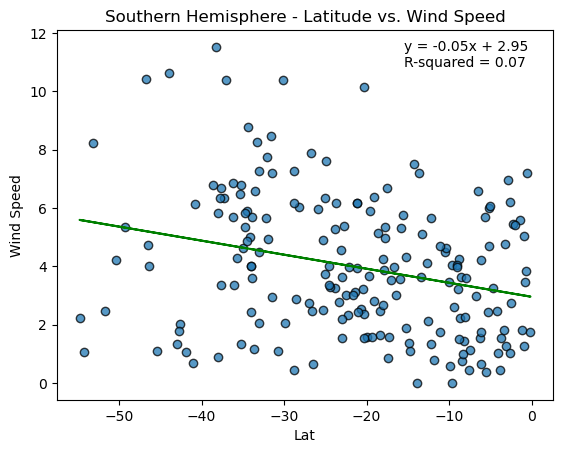

In [22]:
# Southern Hemisphere
southern_wind= southern_hemi_df["Wind Speed"].astype(float)

slope, intercept, r_value, p_value, std_err = linregress(southern_lat, southern_wind)

plt.scatter(southern_lat, southern_wind, marker="o", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")

predicted_wind_south = [slope * lat + intercept for lat in southern_lat]

plt.plot(southern_lat, predicted_wind_south, color='green', label='Linear Regression')

equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(equation, xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
print(f"R-value (Correlation Coefficient): {r_value:.2f}")


plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a notable trend where higher latitudes are associated with higher wind speeds. Conversely, in the Southern Hemisphere, proximity to the Equator corresponds to lower wind speeds. However, it is important to note that these patterns are more distinct and consistent in the Northern Hemisphere, while in the Southern Hemisphere, the data exhibits greater dispersion. As a result, it is challenging to assert a strong relationship between latitude and wind speed in the Southern Hemisphere based on the studied data.